In [1]:
import numpy as np, matplotlib.pyplot as plt
# from importlib import reload
import cvflow as cf
% matplotlib inline

import laneFindingPipeline, utils

show = cf.misc.show

colorFilter = cf.FullPipeline()

HBox(children=(IntProgress(value=0, description='cal. undistort: ', max=20), HTML(value='')))

In [2]:
%%time
allFrames = laneFindingPipeline.utils.loadFrames(maxframes=10)

frame = allFrames['project'][0]

HBox(children=(IntProgress(value=0, description='load project: ', max=10), HTML(value='')))

HBox(children=(IntProgress(value=0, description='load challenge: ', max=10), HTML(value='')))

HBox(children=(IntProgress(value=0, description='load harder_challenge: ', max=10), HTML(value='')))



CPU times: user 112 ms, sys: 40 ms, total: 152 ms
Wall time: 349 ms


In [3]:
laneFinder = laneFindingPipeline.LaneFinder(colorFilter=colorFilter)

drawn = laneFinder.draw(frame);
# show(drawn);

Some lane markings failed inspection!
Some lane markings failed inspection!
(recursion #1)


Saved to /tmp/test.pdf.
Saved to /tmp/test0.pdf.
Saved to /tmp/test1.pdf.
Saved to /tmp/test2.pdf.
Saved to /tmp/test3.pdf.
Saved to /tmp/test4.pdf.
Saved to /tmp/test5.pdf.
Saved to /tmp/test6.pdf.
Saved to /tmp/test7.pdf.
Saved to /tmp/test8.pdf.
Saved to /tmp/test9.pdf.
Saved to /tmp/test10.pdf.


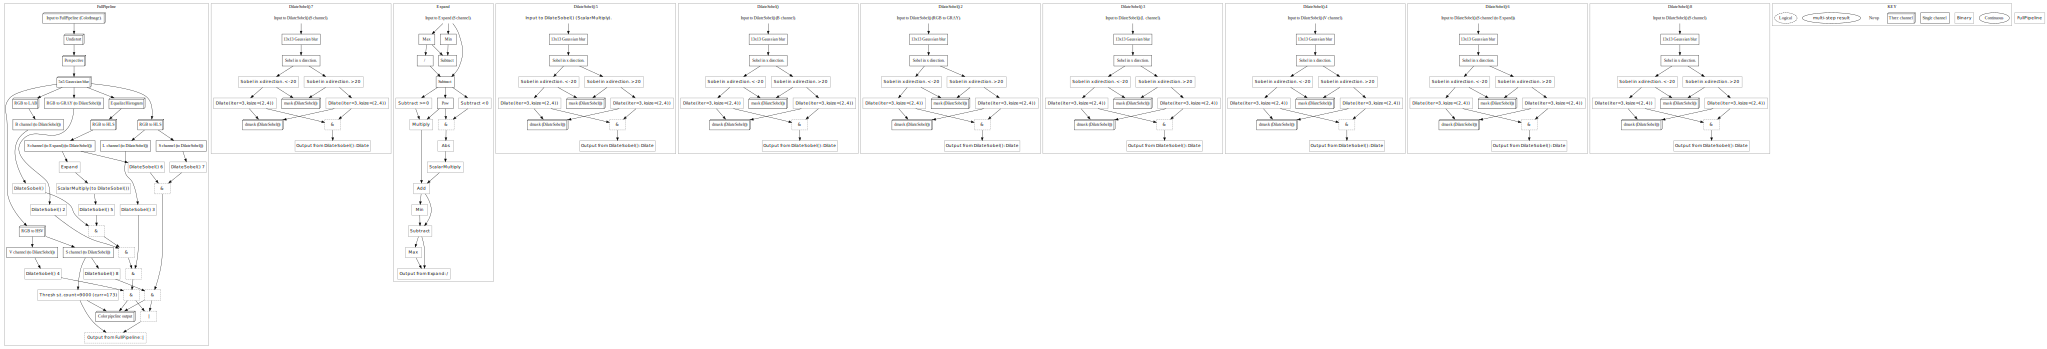

In [4]:
colorFilter.draw(format='pdf', savePath='/tmp/test')

In [5]:
colorFilter.output.nparent(2) in colorFilter.members

True

Measure frames per second without plotting.

In [6]:
%%time
import tqdm
for frame in tqdm.tqdm_notebook(allFrames['project'][:100], unit='frame'):
    laneFinder(frame)

HBox(children=(IntProgress(value=0, max=10), HTML(value='')))

Some lane markings failed inspection!
Some lane markings failed inspection!
(recursion #1)
Some lane markings failed inspection!
Some lane markings failed inspection!
(recursion #1)
Some lane markings failed inspection!
Some lane markings failed inspection!
(recursion #1)
Some lane markings failed inspection!
Some lane markings failed inspection!
(recursion #1)
Some lane markings failed inspection!
Some lane markings failed inspection!
(recursion #1)
Some lane markings failed inspection!
Some lane markings failed inspection!
(recursion #1)
Some lane markings failed inspection!
Some lane markings failed inspection!
(recursion #1)
Some lane markings failed inspection!
Some lane markings failed inspection!
(recursion #1)
Some lane markings failed inspection!
Some lane markings failed inspection!
(recursion #1)
Some lane markings failed inspection!
Some lane markings failed inspection!
(recursion #1)

CPU times: user 3.65 s, sys: 376 ms, total: 4.03 s
Wall time: 2.89 s


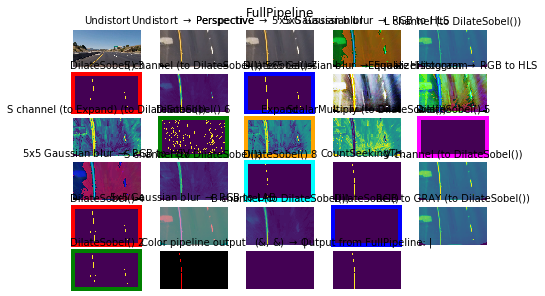

In [7]:
colorFilter.showMembers()

Gather in some `And`s.

In [8]:
# multis = colorFilter.getByKind(cf.MultistepOp)

# existingMembers = []
# for m in multis:
#     existingMembers.extend(m.members)

# ands = []
# for op in colorFilter.output.walk(which=['parents']):
#     if isinstance(op, cf.AndTwoInputs):
#         if op not in existingMembers:
#             ands.append(op)
# colorFilter.includeInMultistep(ands)

Saved to doc/FullPipelineLayout/FullPipeline.png.
Saved to doc/FullPipelineLayout/FullPipeline0.png.
Saved to doc/FullPipelineLayout/FullPipeline1.png.
Saved to doc/FullPipelineLayout/FullPipeline2.png.
Saved to doc/FullPipelineLayout/FullPipeline3.png.
Saved to doc/FullPipelineLayout/FullPipeline4.png.
Saved to doc/FullPipelineLayout/FullPipeline5.png.
Saved to doc/FullPipelineLayout/FullPipeline6.png.
Saved to doc/FullPipelineLayout/FullPipeline7.png.
Saved to doc/FullPipelineLayout/FullPipeline8.png.
Saved to doc/FullPipelineLayout/FullPipeline9.png.
Saved to doc/FullPipelineLayout/FullPipeline10.png.
Saved to doc/FullPipelineLayout/FullPipeline.pdf.
Saved to doc/FullPipelineLayout/FullPipeline0.pdf.
Saved to doc/FullPipelineLayout/FullPipeline1.pdf.
Saved to doc/FullPipelineLayout/FullPipeline2.pdf.
Saved to doc/FullPipelineLayout/FullPipeline3.pdf.
Saved to doc/FullPipelineLayout/FullPipeline4.pdf.
Saved to doc/FullPipelineLayout/FullPipeline5.pdf.
Saved to doc/FullPipelineLayout/

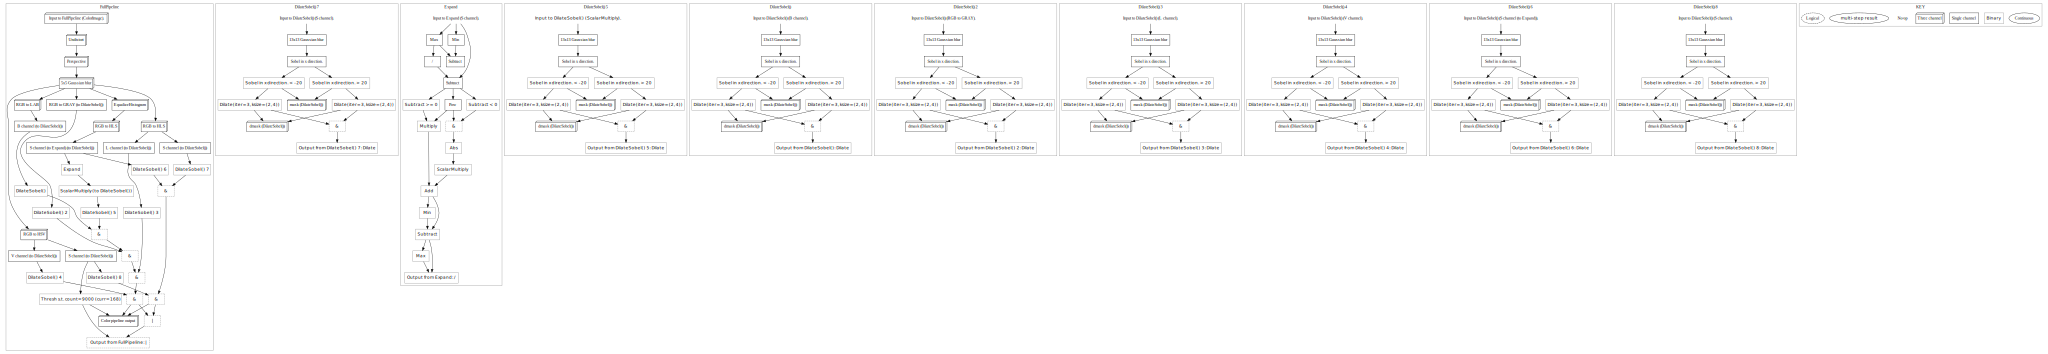

In [9]:
for ext in 'png', 'pdf':
    gv = colorFilter.draw(format=ext, savePath='doc/%sLayout/%s' % (colorFilter, colorFilter), linkMultisteps=False)
gv

In [10]:
visualizer = cf.misc.VisualizeFilter(colorFilter, allFrames)

In [11]:
vid, fig = visualizer.visualizeFromKey('project', maxFrames=12, histogramOverlayAlpha=.5, closeFigure=True);
vid

HBox(children=(IntProgress(value=0, description='cf-FullPipeline-project-vis-12frames.mp4: ', max=10), HTML(value='')))

In [12]:
# visualizer.visualizeFromKey('project', maxFrames=2)

In [13]:
vids32 = {}
for k in allFrames.keys():
    vid, fig = visualizer.visualizeFromKey(k, maxFrames=32)
    vids32[k] = vid

HBox(children=(IntProgress(value=0, description='cf-FullPipeline-project-vis-32frames.mp4: ', max=10), HTML(value='')))

HBox(children=(IntProgress(value=0, description='cf-FullPipeline-challenge-vis-32frames.mp4: ', max=10), HTML(value='')))

HBox(children=(IntProgress(value=0, description='cf-FullPipeline-harder_challenge-vis-32frames.mp4: ', max=10), HTML(value='')))

In [14]:
vids32['project']

In [15]:
vids32['challenge']

In [16]:
vids32['harder_challenge']

In [17]:
%%time
vids = {}
for k in allFrames.keys():
    vids[k] = []
    vids[k].append(utils.transformVideo(allFrames[k], 'cf-%s-%s.mp4' % (laneFinder.colorFilter, k), laneFinder.draw, desc=k))
    vids[k].append(
        utils.transformVideo(
            allFrames[k], 
            'cf-%s-%s-vis.mp4' % (colorFilter, k), 
            lambda frame: visualizer(frame, histogramOverlayAlpha=.5),
            desc=k
        )
    )

HBox(children=(IntProgress(value=0, description='project: ', max=10), HTML(value='')))

Some lane markings failed inspection!
Some lane markings failed inspection!
(recursion #1)
Some lane markings failed inspection!
Some lane markings failed inspection!
(recursion #1)
Some lane markings failed inspection!
Some lane markings failed inspection!
(recursion #1)
Some lane markings failed inspection!
Some lane markings failed inspection!
(recursion #1)
Some lane markings failed inspection!
Some lane markings failed inspection!
(recursion #1)
Some lane markings failed inspection!
Some lane markings failed inspection!
(recursion #1)
Some lane markings failed inspection!
Some lane markings failed inspection!
(recursion #1)
Some lane markings failed inspection!
Some lane markings failed inspection!
(recursion #1)
Some lane markings failed inspection!
Some lane markings failed inspection!
(recursion #1)
Some lane markings failed inspection!
Some lane markings failed inspection!
(recursion #1)



HBox(children=(IntProgress(value=0, description='project: ', max=10), HTML(value='')))

HBox(children=(IntProgress(value=0, description='challenge: ', max=10), HTML(value='')))

Some lane markings failed inspection!
Some lane markings failed inspection!
(recursion #1)
Some lane markings failed inspection!
Some lane markings failed inspection!
(recursion #1)
Some lane markings failed inspection!
Some lane markings failed inspection!
(recursion #1)
Some lane markings failed inspection!
Some lane markings failed inspection!
(recursion #1)
Some lane markings failed inspection!
Some lane markings failed inspection!
(recursion #1)
Some lane markings failed inspection!
Some lane markings failed inspection!
(recursion #1)
Some lane markings failed inspection!
Some lane markings failed inspection!
(recursion #1)
Some lane markings failed inspection!
Some lane markings failed inspection!
(recursion #1)
Some lane markings failed inspection!
Some lane markings failed inspection!
(recursion #1)
Some lane markings failed inspection!
Some lane markings failed inspection!
(recursion #1)



HBox(children=(IntProgress(value=0, description='challenge: ', max=10), HTML(value='')))

HBox(children=(IntProgress(value=0, description='harder_challenge: ', max=10), HTML(value='')))

Some lane markings failed inspection!



HBox(children=(IntProgress(value=0, description='harder_challenge: ', max=10), HTML(value='')))


CPU times: user 4min 14s, sys: 2min 6s, total: 6min 20s
Wall time: 3min 52s


(<matplotlib.figure.Figure at 0x7f399806bb38>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f3a018900b8>)

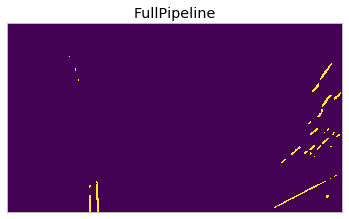

In [18]:
colorFilter.showValue()

Some lane markings failed inspection!
Some lane markings failed inspection!
(recursion #1)


(<matplotlib.figure.Figure at 0x7f39bf779be0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f3a01bdcf98>)

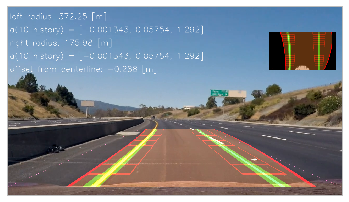

In [19]:
show(laneFinder.draw(frame))

In [20]:
import gc; gc.collect()

14171

In [21]:
plt.close('all')

In [22]:
import gc; gc.collect()

0

In [23]:
k = 'project'
v1, v2 = vids[k]

In [24]:
v1

In [25]:
v2

In [26]:
k = 'challenge'
v1, v2 = vids[k]

In [27]:
v1

In [28]:
v2

In [29]:
k = 'harder_challenge'
v1, v2 = vids[k]

In [30]:
v1

In [31]:
v2